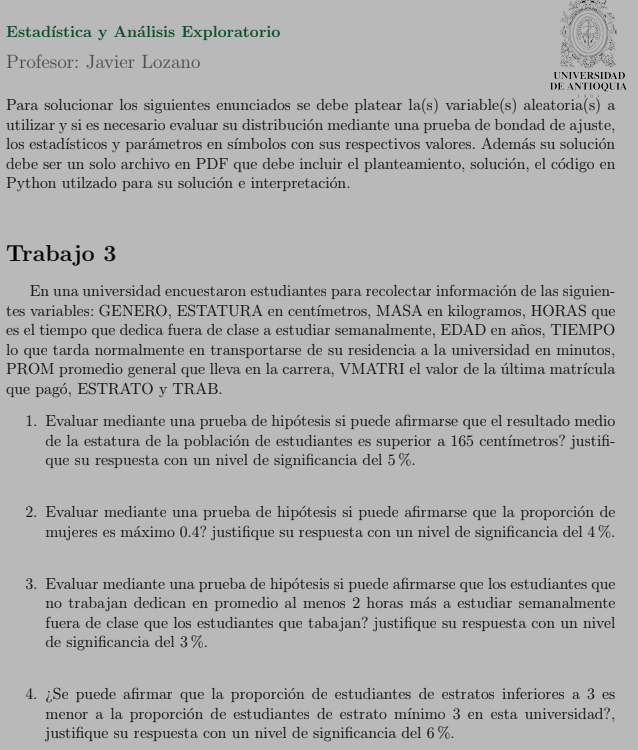

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t, norm, shapiro, kstest
import statsmodels.api as sm
import matplotlib.pyplot as plt


data = pd.read_excel('BaseTaller3EAE20252.xlsx')

data.head()

,GENERO,ESTATURA,MASA,HORAS,EDAD,TIEMPO,PROM,VMATRI,ESTRATO,TRAB
0,MUJER,155.6,64.0,38,20.8,21.8,4.1,1734.0,4,NO
1,MUJER,153.6,67.4,36,19.0,31.2,3.9,835.8,3,SI
2,MUJER,168.4,62.3,40,20.6,51.7,3.5,127.5,1,NO
3,MUJER,180.9,84.2,42,19.3,34.1,4.2,1659.0,4,NO
4,HOMBRE,165.3,64.1,28,27.8,7.2,3.2,915.6,3,NO


Punto 1


 Variable a analizar  

 estatura_i = Estatura del estudiante i en cm

 Ho: u <= 165 Ha : u > 165

In [2]:
# Ho: u <= 165 Ha : u > 165
x_bar = data['ESTATURA'].mean()
s = data['ESTATURA'].std()
n = data['ESTATURA'].shape[0]
u0 = 165
alfa = 0.05

stat, p = shapiro(data['ESTATURA'])

print(f'Estadístico de Shapiro-Wilk: {stat}')
print(f'Valor-p: {p}')

# Interpretación
if p > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")

# Dado que el p-valor > nivel_significancia para la prueba de Shapiro-Wilk, no hay suficiente evidencia para rechazar la hipótesis nula. Se puede decir que los datos se distribuyen normalmente.  
# Procedemos a encontrar el Tc y el p-valor para la prueba t de una muestra.

t_critico = t.ppf(1 - alfa, n - 1)
t_calculado = (x_bar - u0) / (s / np.sqrt(n))

print(f'T crítico: {t_critico}')
print(f'T calculado: {t_calculado}')
if t_calculado > t_critico:
    print("Finalmente concluimos que por el estadistico T: Se rechaza H0: La estatura promedio es mayor a 165 cm.")
else:
    print("Finalmente concluimos que por el estadistico T: No se rechaza H0: No hay evidencia suficiente para afirmar que la estatura promedio es mayor a 165 cm.")

p_valor = t.sf(t_calculado, n - 1)
print(f'Valor-p: {p_valor}')

if p_valor <= alfa:
    print("Finalmente concluimos que por el valor P: Se rechaza H0: La estatura promedio es mayor a 165 cm.")
else:
    print("Finalmente concluimos que por el valor P: No se rechaza H0: No hay evidencia suficiente para afirmar que la estatura promedio es mayor a 165 cm.")

Estadístico de Shapiro-Wilk: 0.9889646533473238
Valor-p: 0.6548633321502867
No se rechaza H0: La columna parece provenir de una distribución normal.
T crítico: 1.662155325834565
T calculado: 3.0046831801800993
Finalmente concluimos que por el estadistico T: Se rechaza H0: La estatura promedio es mayor a 165 cm.
Valor-p: 0.0017264538466832634
Finalmente concluimos que por el valor P: Se rechaza H0: La estatura promedio es mayor a 165 cm.


Punto 2

Variable a analizar  

p = Proporcion de mujeres.

Ho: p <= 0.4 Ha: p > 0.4

In [3]:
# Ho: p <= 0.4 Ha: p > 0.4

alfa2 = 4/100
x = (data['GENERO'] == "MUJER").sum()
n2 = data['GENERO'].shape[0]
p = x / n2
p0 = 0.4

z_calculado = (p - p0) / np.sqrt((p0 * (1 - p0)) / n2)
z_critico = norm.ppf(1 - alfa2)

print(f'Z crítico: {z_critico}')
print(f'Z calculado: {z_calculado}')
if z_calculado > z_critico:
    print("Finalmente concluimos que por el estadistico Z: Se rechaza H0: La proporción de mujeres es mayor a 0.4.")
else:
    print("Finalmente concluimos que por el estadistico Z: No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.")

p_valor2 = norm.sf(z_calculado)
print(f'Valor-p: {p_valor2}')

if p_valor2 <= alfa2:
    print("Finalmente concluimos que por el valor P: Se rechaza H0: La proporción de mujeres es mayor a 0.4.")
else:
    print("Finalmente concluimos que por el valor P: No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.")


Z crítico: 1.7506860712521692
Z calculado: 0.43033148291193474
Finalmente concluimos que por el estadistico Z: No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.
Valor-p: 0.3334772643464099
Finalmente concluimos que por el valor P: No se rechaza H0: No hay evidencia suficiente para afirmar que la proporción de mujeres es mayor a 0.4.


Punto 3

Variables a analizar

1. est_no_trabajan_horas_i = cantidad de horas que el estudiante i que no trabaja dedica fuera de clase a estudiar semanalmente. 
2. est_si_trabajan_horas_j = cantidad de horas que el estudiante j que si trabaja dedica fuera de clase a estudiar semanalmente.

* x1: media muestral de est_no_trabajan_horas_i 
* x2: media muestral de est_si_trabajan_horas_j

Ho: u1 - u2 >= 2 Ha: u1 - u2 < 2

Prueba Shapiro-Wilk para estudiantes que si trabajan
Estadístico de Shapiro-Wilk: 0.9190243367297621
Valor-p: 0.02224189985051193
Se rechaza H0: La columna NO parece provenir de una distribución normal por Shapiro.
Prueba Shapiro-Wilk para estudiantes que no trabajan
Estadístico de Shapiro-Wilk: 0.9271517676400447
Valor-p: 0.0016703938886252364
Se rechaza H0: La columna NO parece provenir de una distribución normal por Shapiro.
P-valor de la prueba de Kolmogorov-Smirnov para estudiantes que no trabajan: 0.20434071902425088
P-valor de la prueba de Kolmogorov-Smirnov para estudiantes que si trabajan: 0.07303673671899236
No se rechaza H0: La columna parece provenir de una distribución normal.
No se rechaza H0: La columna parece provenir de una distribución normal.

QQ plot para estudiantes que no trabajan


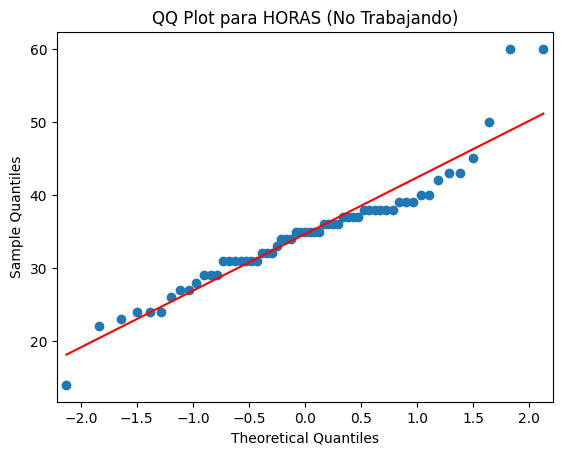

QQ plot para estudiantes que si trabajan


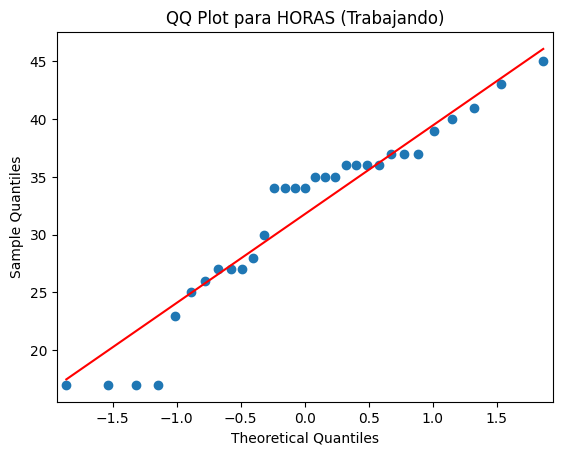

Realizamos tres pruebas para comprobar normalidad, Shapiro resulta que no existe normalidad, Kolmogorov-Smirnov arroja que si existe normalidad y por ultimo el QQplot nos indica que uno si evidencia normalidad y el otro no.

Finalmente nos decantamos por la opcion de NO-normalidad

Z crítico: -1.880793608151251
Z calculado: 0.5023130627952186
Valor-p: 0.692276339028579
No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.


In [4]:
est_no_trab = data[data["TRAB"] == 'NO']
est_trab = data[data["TRAB"] == 'SI']

x1 = est_no_trab['HORAS'].mean()
s1 = est_no_trab['HORAS'].std()
n1 = est_no_trab['HORAS'].shape[0]
x2 = est_trab['HORAS'].mean()
s2 = est_trab['HORAS'].std()
n2 = est_trab['HORAS'].shape[0]
delta = 2
alfa3 = 0.03

print('Prueba Shapiro-Wilk para estudiantes que si trabajan')
stat1, p1 = shapiro(est_trab['HORAS'])

print(f'Estadístico de Shapiro-Wilk: {stat1}')
print(f'Valor-p: {p1}')
# Interpretación
if p1 > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal por Shapiro.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal por Shapiro.")

print('Prueba Shapiro-Wilk para estudiantes que no trabajan')

stat2, p2 = shapiro(est_no_trab['HORAS'])

print(f'Estadístico de Shapiro-Wilk: {stat2}')
print(f'Valor-p: {p2}')
# Interpretación
if p2 > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal por Shapiro.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal por Shapiro.")

ktest_no_trabajan_est, ktest_no_trabajan_pvalor = kstest(est_no_trab['HORAS'], 'norm', args=(x1, s1))
ktest_si_trabajan_est, ktest_si_trabajan_pvalor = kstest(est_trab['HORAS'], 'norm', args=(x2, s2))

print(f"P-valor de la prueba de Kolmogorov-Smirnov para estudiantes que no trabajan: {ktest_no_trabajan_pvalor}")
print(f"P-valor de la prueba de Kolmogorov-Smirnov para estudiantes que si trabajan: {ktest_si_trabajan_pvalor}")

# Interpretación
if ktest_no_trabajan_pvalor > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")

# Interpretación
if ktest_si_trabajan_pvalor > 0.05:
    print("No se rechaza H0: La columna parece provenir de una distribución normal.")
else:
    print("Se rechaza H0: La columna NO parece provenir de una distribución normal.")

# QQ plot para est_no_trab['HORAS']
print('\nQQ plot para estudiantes que no trabajan')
sm.qqplot(est_no_trab['HORAS'], line='s')
plt.title('QQ Plot para HORAS (No Trabajando)')
plt.show()

# QQ plot para est_trab['HORAS']
print('QQ plot para estudiantes que si trabajan')
sm.qqplot(est_trab['HORAS'], line='s')
plt.title('QQ Plot para HORAS (Trabajando)')
plt.show()

print('Realizamos tres pruebas para comprobar normalidad, Shapiro resulta que no existe normalidad, Kolmogorov-Smirnov arroja que si existe normalidad y por ultimo el QQplot nos indica que uno si evidencia normalidad y el otro no.')
print('\nFinalmente nos decantamos por la opcion de NO-normalidad\n')

z_calculado = (x1 - x2 - delta) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
z_critico = norm.ppf(alfa3)

print(f'Z crítico: {z_critico}')
print(f'Z calculado: {z_calculado}')

p_valor = norm.cdf(z_calculado)

print(f'Valor-p: {p_valor}')
if p_valor <= alfa3:
    print("Se rechaza H0: La diferencia en horas es menor a 2.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar que la diferencia en horas es menor a 2.")

Punto 4

In [5]:
# Diferencia de proporciones

# Variables a analizar

# p1: Proporción de estudiantes de estratos menores a 3
# p2: Proporción de estudiantes de estratos mayores o iguales a 3

# Planteamiento de hipótesis
# H0: p1 - p2 >= 0
# H1: p1 - p2 < 0 

alpha = 0.06
estu_estratos_menores_3 = data[data['ESTRATO'] < 3]
estu_estratos_mayores_3 = data[data['ESTRATO'] >= 3]
n = data.shape[0]
n1 = estu_estratos_menores_3.shape[0]
n2 = estu_estratos_mayores_3.shape[0]
x1 = estu_estratos_menores_3['ESTRATO'].count()
x2 = estu_estratos_mayores_3['ESTRATO'].count()

p1 = x1 / n
p2 = x2 / n
delta = 0

z_observado = (p1 - p2 - delta) / np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
z_critico = norm.ppf(alpha)
p_valuee = norm.cdf(z_observado)

print(f'Z observado: {z_observado}')
print(f'Z crítico: {z_critico}')
print(f'P-valor: {p_valuee}')

if z_observado <= z_critico:
    print("Se rechaza H0 por Region de Rechazo: La proporción de estudiantes de estratos menores a 3 que trabajan es menor que la de estratos mayores o iguales a 3.")
else:
    print("No se rechaza H0 por Region de Rechazo: La proporción de estudiantes de estratos menores a 3 que trabajan no es menor que la de estratos mayores o iguales a 3.")
if p_valuee <= alpha:
    print("Se rechaza H0 por valor-P: La proporción de estudiantes de estratos menores a 3 que trabajan es menor que la de estratos mayores o iguales a 3.")
else:
    print("No se rechaza H0 por valor-P: La proporción de estudiantes de estratos menores a 3 que trabajan no es menor que la de estratos mayores o iguales a 3.")


Z observado: -5.902918298980975
Z crítico: -1.5547735945968535
P-valor: 1.785635790264986e-09
Se rechaza H0 por Region de Rechazo: La proporción de estudiantes de estratos menores a 3 que trabajan es menor que la de estratos mayores o iguales a 3.
Se rechaza H0 por valor-P: La proporción de estudiantes de estratos menores a 3 que trabajan es menor que la de estratos mayores o iguales a 3.
